<a href="https://colab.research.google.com/github/oresho/Assignment1/blob/main/speech2Rasp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install python_speech_features
import os
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5889 sha256=36d0a7cb5729d6a000f6a9e160f2d9f4694755d5a97385fb858b1c3788ea8ce5
  Stored in directory: /root/.cache/pip/wheels/5b/60/87/28af2605138deac93d162904df42b6fdda1dab9b8757c62aa3
Successfully built python_speech_features


In [2]:
tf.keras.utils.get_file('speech_commands_v0.02.tar.gz',
                        'http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz',
                        cache_dir='./',
                        cache_subdir='dataset-speech',
                        extract=True)

2428923189/2428923189 [==============================] - 31s 0us/step


'./dataset-speech/speech_commands_v0.02.tar.gz'

In [3]:
# Dataset path and view possible targets
dataset_path = './dataset-speech'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)


sheila
five
dog
_background_noise_
stop
one
left
off
eight
forward
wow
seven
marvin
on
four
learn
six
nine
no
yes
cat
zero
follow
three
down
bed
up
visual
house
go
tree
right
two
happy
bird
backward


In [4]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['sheila', 'five', 'dog', '_background_noise_', 'stop', 'one', 'left', 'off', 'eight', 'forward', 'wow', 'seven', 'marvin', 'on', 'four', 'learn', 'six', 'nine', 'no', 'yes', 'cat', 'zero', 'follow', 'three', 'down', 'bed', 'up', 'visual', 'house', 'go', 'tree', 'right', 'two', 'happy', 'bird', 'backward']


In [5]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['sheila', 'five', 'dog', 'stop', 'one', 'left', 'off', 'eight', 'forward', 'wow', 'seven', 'marvin', 'on', 'four', 'learn', 'six', 'nine', 'no', 'yes', 'cat', 'zero', 'follow', 'three', 'down', 'bed', 'up', 'visual', 'house', 'go', 'tree', 'right', 'two', 'happy', 'bird', 'backward']


In [6]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

2022
4052
2128
3872
3890
3801
3745
3787
1557
2123
3998
2100
3845
3728
1575
3860
3934
3941
4044
2031
4052
1579
3727
3917
2014
3723
1592
2113
3880
1759
3778
3880
2054
2064
1664
Total samples: 105829


In [7]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 8000
num_mfcc = 16
len_mfcc = 16

In [8]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

./dataset-speech/sheila
./dataset-speech/five
./dataset-speech/dog
./dataset-speech/stop
./dataset-speech/one
./dataset-speech/left
./dataset-speech/off
./dataset-speech/eight
./dataset-speech/forward
./dataset-speech/wow
./dataset-speech/seven
./dataset-speech/marvin
./dataset-speech/on
./dataset-speech/four
./dataset-speech/learn
./dataset-speech/six
./dataset-speech/nine
./dataset-speech/no
./dataset-speech/yes
./dataset-speech/cat
./dataset-speech/zero
./dataset-speech/follow
./dataset-speech/three
./dataset-speech/down
./dataset-speech/bed
./dataset-speech/up
./dataset-speech/visual
./dataset-speech/house
./dataset-speech/go
./dataset-speech/tree
./dataset-speech/right
./dataset-speech/two
./dataset-speech/happy
./dataset-speech/bird
./dataset-speech/backward


In [9]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]), array([2., 2., 2., ..., 2., 2., 2.]), array([3., 3., 3., ..., 3., 3., 3.]), array([4., 4., 4., ..., 4., 4., 4.]), array([5., 5., 5., ..., 5., 5., 5.]), array([6., 6., 6., ..., 6., 6., 6.]), array([7., 7., 7., ..., 7., 7., 7.]), array([8., 8., 8., ..., 8., 8., 8.]), array([9., 9., 9., ..., 9., 9., 9.]), array([10., 10., 10., ..., 10., 10., 10.]), array([11., 11., 11., ..., 11., 11., 11.]), array([12., 12., 12., ..., 12., 12., 12.]), array([13., 13., 13., ..., 13., 13., 13.]), array([14., 14., 14., ..., 14., 14., 14.]), array([15., 15., 15., ..., 15., 15., 15.]), array([16., 16., 16., ..., 16., 16., 16.]), array([17., 17., 17., ..., 17., 17., 17.]), array([18., 18., 18., ..., 18., 18., 18.]), array([19., 19., 19., ..., 19., 19., 19.]), array([20., 20., 20., ..., 20., 20., 20.]), array([21., 21., 21., ..., 21., 21., 21.]), array([22., 22., 22., ..., 22., 22., 22.]), array([23., 23., 23., ..., 23., 23., 23.]), arr

In [10]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [11]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [12]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

105829
105829


In [13]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [14]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [15]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [16]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=1.0,
                                            ceplifter=1,
                                            appendEnergy=True,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [17]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
        

Dropped: 35 (16, 15)
Dropped: 39 (16, 13)
Dropped: 43 (16, 12)
Dropped: 50 (16, 14)
Dropped: 58 (16, 11)
Dropped: 62 (16, 13)
Dropped: 67 (16, 14)
Dropped: 74 (16, 8)
Dropped: 100 (16, 12)
Dropped: 101 (16, 14)
Dropped: 107 (16, 8)
Dropped: 115 (16, 11)
Dropped: 117 (16, 12)
Dropped: 122 (16, 13)
Dropped: 148 (16, 14)
Dropped: 158 (16, 15)
Dropped: 202 (16, 13)
Dropped: 212 (16, 7)
Dropped: 216 (16, 14)
Dropped: 228 (16, 11)
Dropped: 236 (16, 12)
Dropped: 245 (16, 11)
Dropped: 254 (16, 14)
Dropped: 284 (16, 12)
Dropped: 287 (16, 11)
Dropped: 290 (16, 8)
Dropped: 298 (16, 12)
Dropped: 300 (16, 15)
Dropped: 301 (16, 10)
Dropped: 315 (16, 14)
Dropped: 322 (16, 10)
Dropped: 328 (16, 11)
Dropped: 335 (16, 10)
Dropped: 336 (16, 15)
Dropped: 345 (16, 15)
Dropped: 348 (16, 15)
Dropped: 355 (16, 10)
Dropped: 370 (16, 15)
Dropped: 373 (16, 11)
Dropped: 380 (16, 7)
Dropped: 386 (16, 10)
Dropped: 390 (16, 13)
Dropped: 395 (16, 12)
Dropped: 415 (16, 13)
Dropped: 429 (16, 9)
Dropped: 446 (16, 14)
Dr

In [18]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.096


MFCCs: [[-2.76518903e+00 -2.83573721e+00 -2.91722709e+00 -2.84243276e+00
  -2.76972111e+00 -2.87873492e+00 -2.85576131e+00 -2.70922787e+00
  -2.73009829e+00 -2.75923634e+00 -2.75577492e+00 -2.12215723e+00
   5.02327895e-01  2.27613836e+00  2.99553584e+00  2.82209662e+00]
 [-1.34784637e-01  6.71150665e-02 -3.35987809e-01 -3.60584691e-01
  -1.04734800e-01 -9.09240380e-02 -3.03453168e-01 -1.89984162e-01
  -4.49826007e-01 -1.15516191e+00 -1.38927494e+00 -1.60476110e+00
  -4.96031323e+00 -7.73812796e+00 -8.02020064e+00 -6.47587528e+00]
 [-1.27613236e+00 -1.07551870e+00 -1.37728678e+00 -1.69393183e+00
  -1.72338500e+00 -1.65216022e+00 -1.39768747e+00 -9.84856020e-01
  -1.24476769e+00 -1.92498793e+00 -2.31210715e+00 -3.40996318e+00
  -6.27036644e+00 -7.51618750e+00 -7.95806918e+00 -7.84683947e+00]
 [ 1.27172942e+00  1.36153957e+00  9.40553972e-01  1.02695739e+00
   1.15351267e+00  9.25644766e-01  8.97588232e-01  1.19673132e+00
   1.14607017e+00  5.65317660e-01  1.54176947e-01 -3.25125329e-01


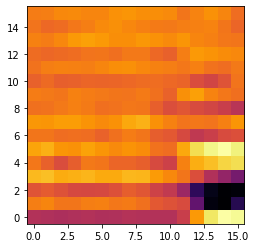

In [19]:
# TEST: Test shorter MFCC
#!pip install playsound
#from playsound import playsound

idx = 13

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
#playsound(path)

In [20]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [ ]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Dropped: 35 (16, 15)
Dropped: 39 (16, 13)
Dropped: 43 (16, 12)
Dropped: 50 (16, 14)
Dropped: 58 (16, 11)
Dropped: 62 (16, 13)
Dropped: 67 (16, 14)
Dropped: 74 (16, 8)
Dropped: 100 (16, 12)
Dropped: 101 (16, 14)
Dropped: 107 (16, 8)
Dropped: 115 (16, 11)
Dropped: 117 (16, 12)
Dropped: 122 (16, 13)
Dropped: 148 (16, 14)
Dropped: 158 (16, 15)
Dropped: 202 (16, 13)
Dropped: 212 (16, 7)
Dropped: 216 (16, 14)
Dropped: 228 (16, 11)
Dropped: 236 (16, 12)
Dropped: 245 (16, 11)
Dropped: 254 (16, 14)
Dropped: 284 (16, 12)
Dropped: 287 (16, 11)
Dropped: 290 (16, 8)
Dropped: 298 (16, 12)
Dropped: 300 (16, 15)
Dropped: 301 (16, 10)
Dropped: 315 (16, 14)
Dropped: 322 (16, 10)
Dropped: 328 (16, 11)
Dropped: 335 (16, 10)
Dropped: 336 (16, 15)
Dropped: 345 (16, 15)
Dropped: 348 (16, 15)
Dropped: 355 (16, 10)
Dropped: 370 (16, 15)
Dropped: 373 (16, 11)
Dropped: 380 (16, 7)
Dropped: 386 (16, 10)
Dropped: 390 (16, 13)
Dropped: 395 (16, 12)
Dropped: 415 (16, 13)
Dropped: 429 (16, 9)
Dropped: 446 (16, 14)
Dr

In [ ]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [ ]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

In [ ]:
len(feature_sets['x_train'])

In [ ]:
print(feature_sets['y_val'])

In [ ]:
from tensorflow.keras import layers, models

In [ ]:
# Create list of all targets (minus background noise)
# dataset_path = 'C:\\PATH\\TO\\speech_commands_dataset'
# all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
# all_targets.remove('_background_noise_')
print(all_targets)

In [ ]:
# Settings
feature_sets_path = './'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'wake_word_stop_model.h5'
wake_word = 'stop'

In [ ]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

In [ ]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [ ]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [ ]:
# Peek at labels
print(y_val)

In [ ]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [ ]:
# Peek at labels after conversion
print(y_val)

In [ ]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

In [ ]:
# View the dimensions of our input data
print(x_train.shape)

In [ ]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

In [ ]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

In [ ]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# Display model
model.summary()

In [ ]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

In [ ]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

In [ ]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Save the model as a file
models.save_model(model, model_filename)

In [ ]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

In [ ]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

In [ ]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

In [ ]:
from tensorflow import lite

In [ ]:
# Parameters
keras_model_filename = 'wake_word_stop_model.h5'
tflite_filename = 'wake_word_stop_lite.tflite'

In [ ]:
# Convert model to TF Lite model
model = models.load_model(keras_model_filename)
converter = lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(tflite_filename, 'wb').write(tflite_model)